<a href="https://colab.research.google.com/github/NLDL-breast-cancer/NLDL-breast-cancer/blob/main/Breast_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Section 1 Problem Statement and Data Inspection

**Breast cancer**

In this colab we are looking at the [data](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data) that handles 569 patients who got diagnosis of breast cancer. More precisely, they all had tumorous mass but not each was proved to be malignant. Some of them were diagnosed as malignant and others as benign, although more precise classification would be benign, pre-malignant and malignant. We first load the data and prepare them for inspection done as in the following [code](https://github.com/milaan9/93_Python_Data_Analytics_Projects/blob/main/007_Breast_Cancer_Prediction_with_ML/Breast_Cancer_Prediction.ipynb).

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

url='https://raw.githubusercontent.com/NLDL-breast-cancer/NLDL-breast-cancer/refs/heads/main/data.csv'
df=pd.read_csv(url)
df.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


Now we can see that diagnosis is divided into M (malignant) and B (benign). Next, let us see how many of the patients were diagnosed with M and how many with B. We are just going to remove the id data for now because it is not useful for the analysis. However, it is useful to save the full version for later.

In [3]:
df_full=pd.read_csv(url)
df.drop('id', axis =1, inplace=True)
df_without_id=df
df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
diag_gr = df.groupby('diagnosis', axis=0)
pd.DataFrame(diag_gr.size(), columns=['# of observations'])

<ipython-input-4-e6b6b18af498>:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  diag_gr = df.groupby('diagnosis', axis=0)


,# of observations
diagnosis,
B,357
M,212


Now we can see that we have 357 patients with benign diagnosis and 212 with malignant. The next step is to plot histograms. However, let us get information on the data to see can they somehow be divided in groups.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

We can see that we are dealing with three groups done on the same data. Those are mean, se and worst values. In each of those groups we can see that we have non-null objects. Alternativelly, that could have been checked by the following command.

In [6]:
df.isnull().any()

,0
diagnosis,False
radius_mean,False
texture_mean,False
perimeter_mean,False
area_mean,False
smoothness_mean,False
compactness_mean,False
concavity_mean,False
concave points_mean,False
symmetry_mean,False


Also, we can use the following code to see if there are just the two cases of diagnosis (although we can see it in the part above where we saw exactly how many of B and M cases there are).

In [7]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

#Section 2 Exploratory Data Analysis

Now we can divide our data into three groups as mentioned before and then plot first histograms. However, we now want to work with full data, so the one with id included.

In [8]:
df=df_full
df_id_diag=df.loc[:,["id","diagnosis"]]
df_diag=df.loc[:,["diagnosis"]]

df_mean=df.iloc[:,1:12]
df_se=df.iloc[:,12:22]
df_worst=df.iloc[:,22:]

print(df_id_diag.columns)

Index(['id', 'diagnosis'], dtype='object')


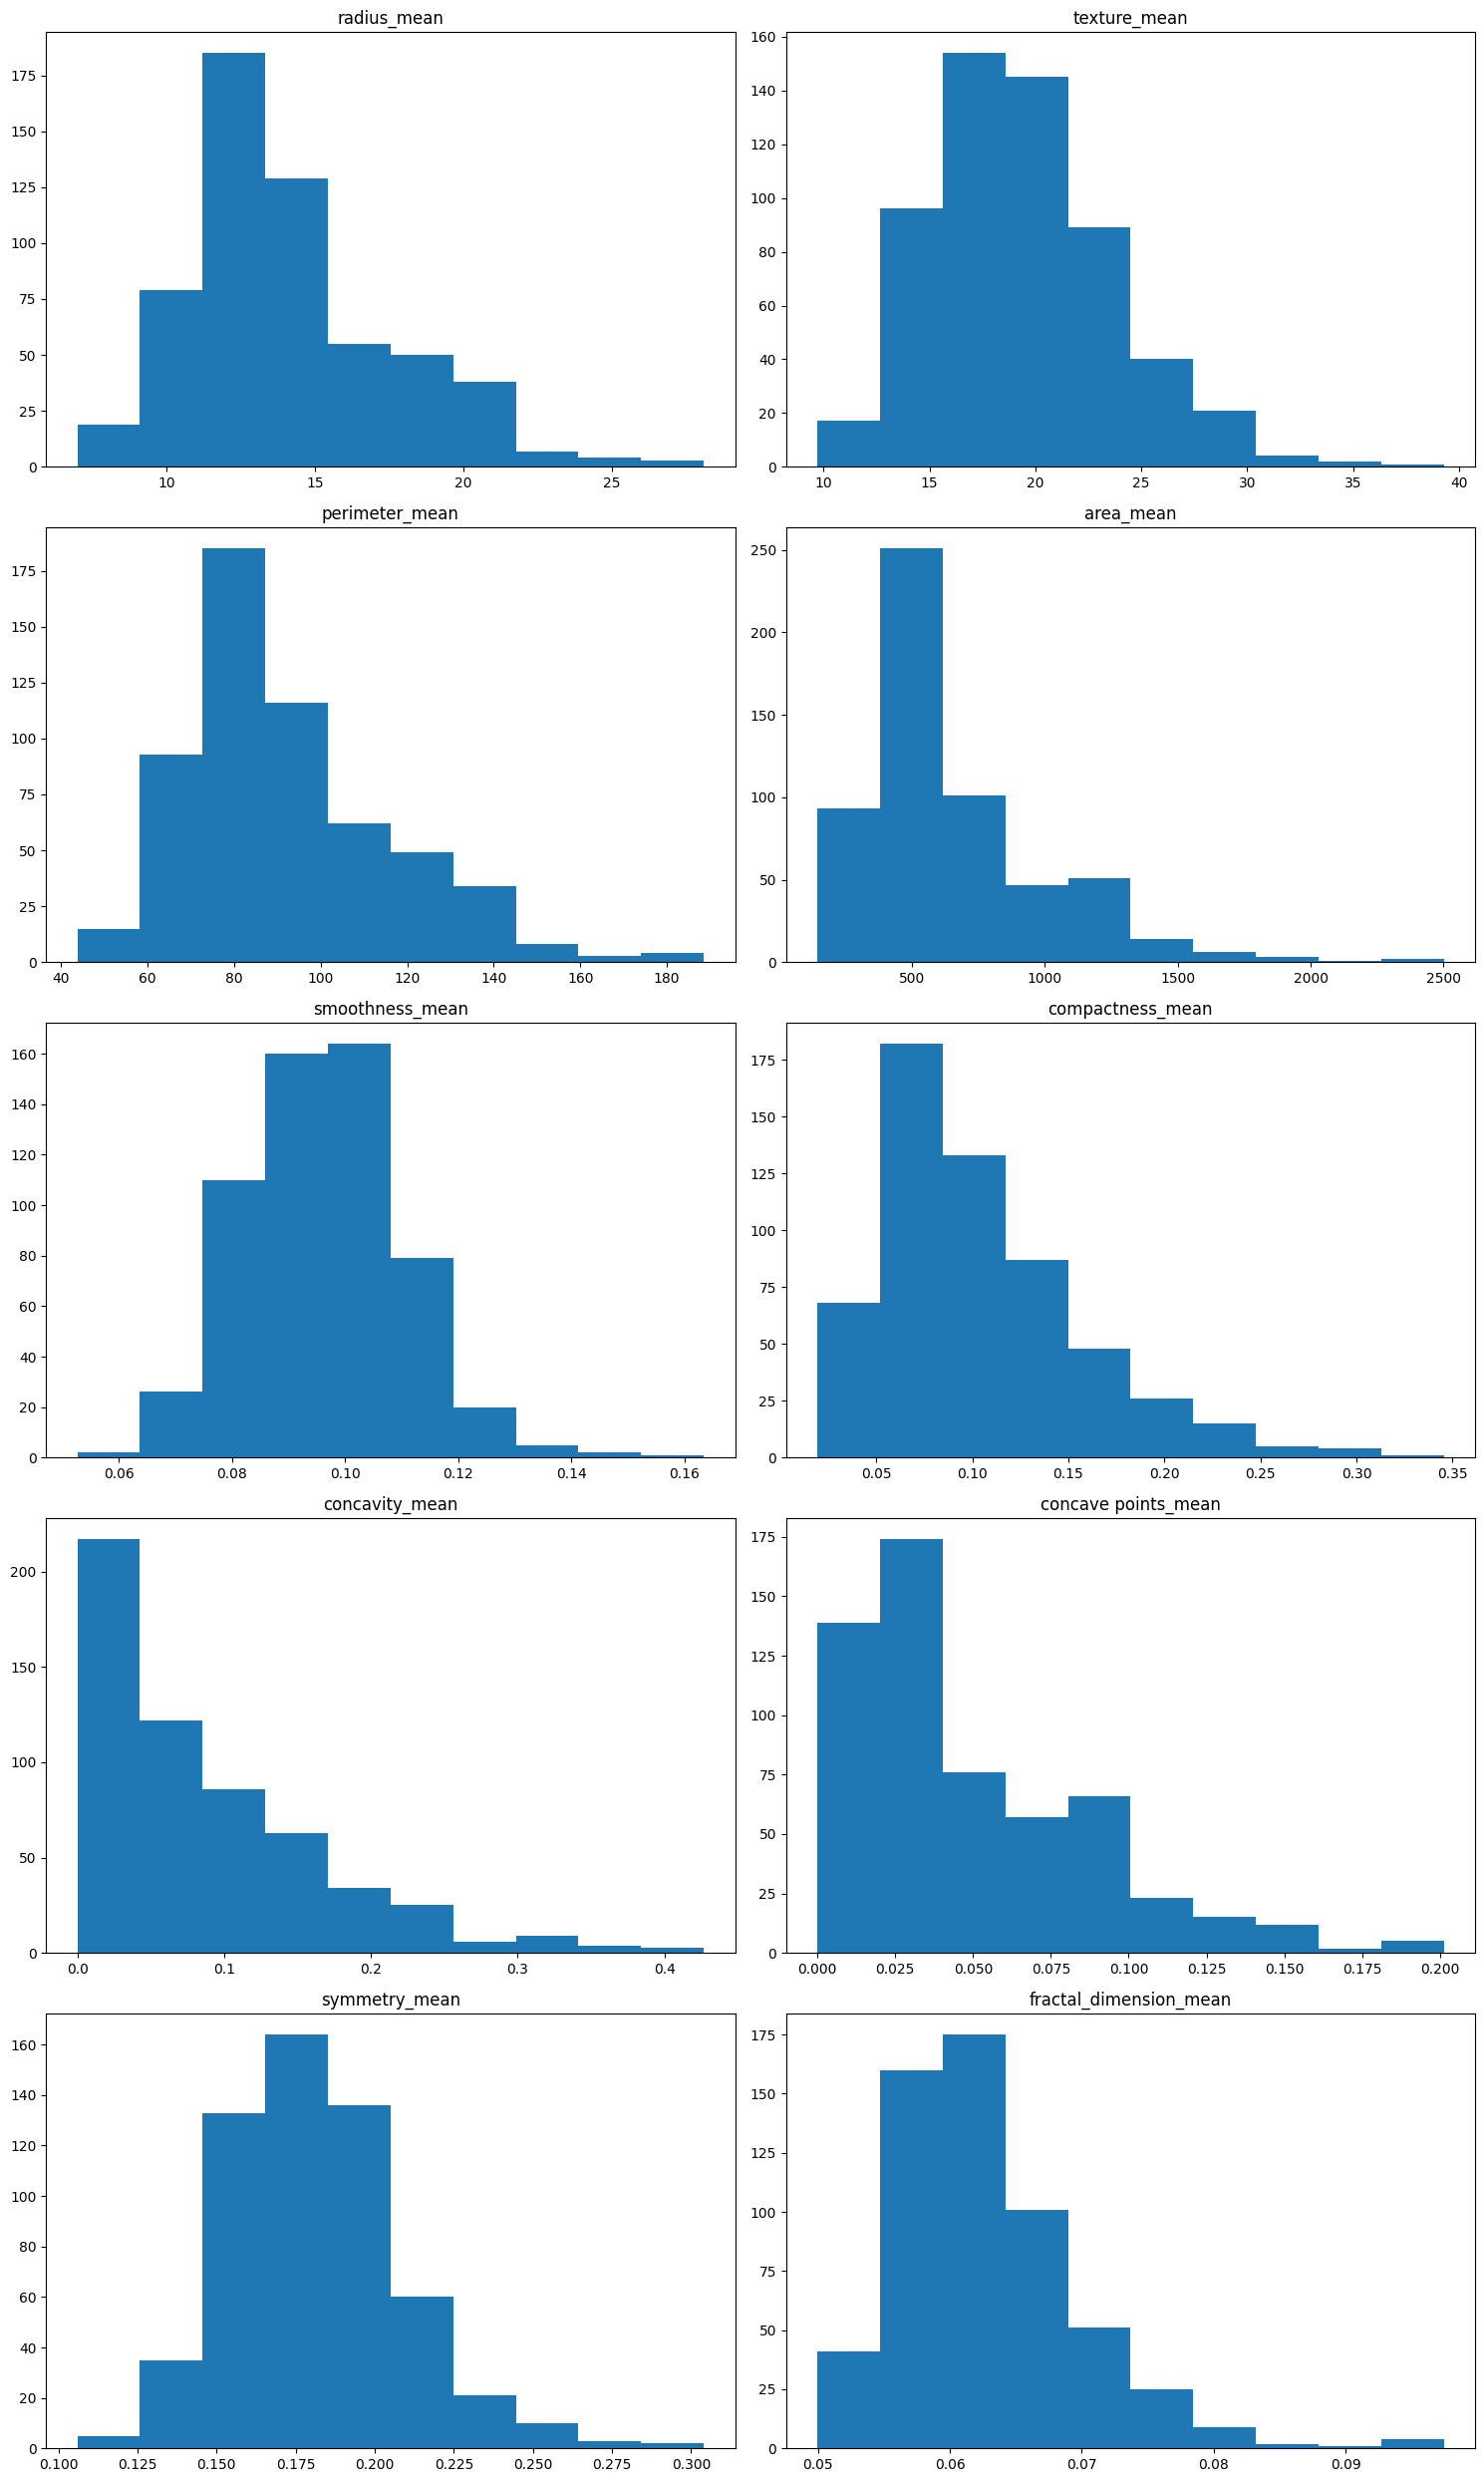

In [9]:
import matplotlib.pyplot as plt

# Set number of rows and columns
rows, cols = 5, 2

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 25))  # Adjust figure size for better visibility
axes = axes.flatten()  # Flatten to 1D for easy iteration

# Plot histograms for each column in df_mean
for i, column in enumerate(df_mean.columns[1:11]):  # Ensure we only plot up to 10 features
    df_mean[column].hist(bins=10, ax=axes[i], grid=False)
    axes[i].set_title(column)  # Set title for each subplot

# Adjust layout
plt.tight_layout()
plt.show()


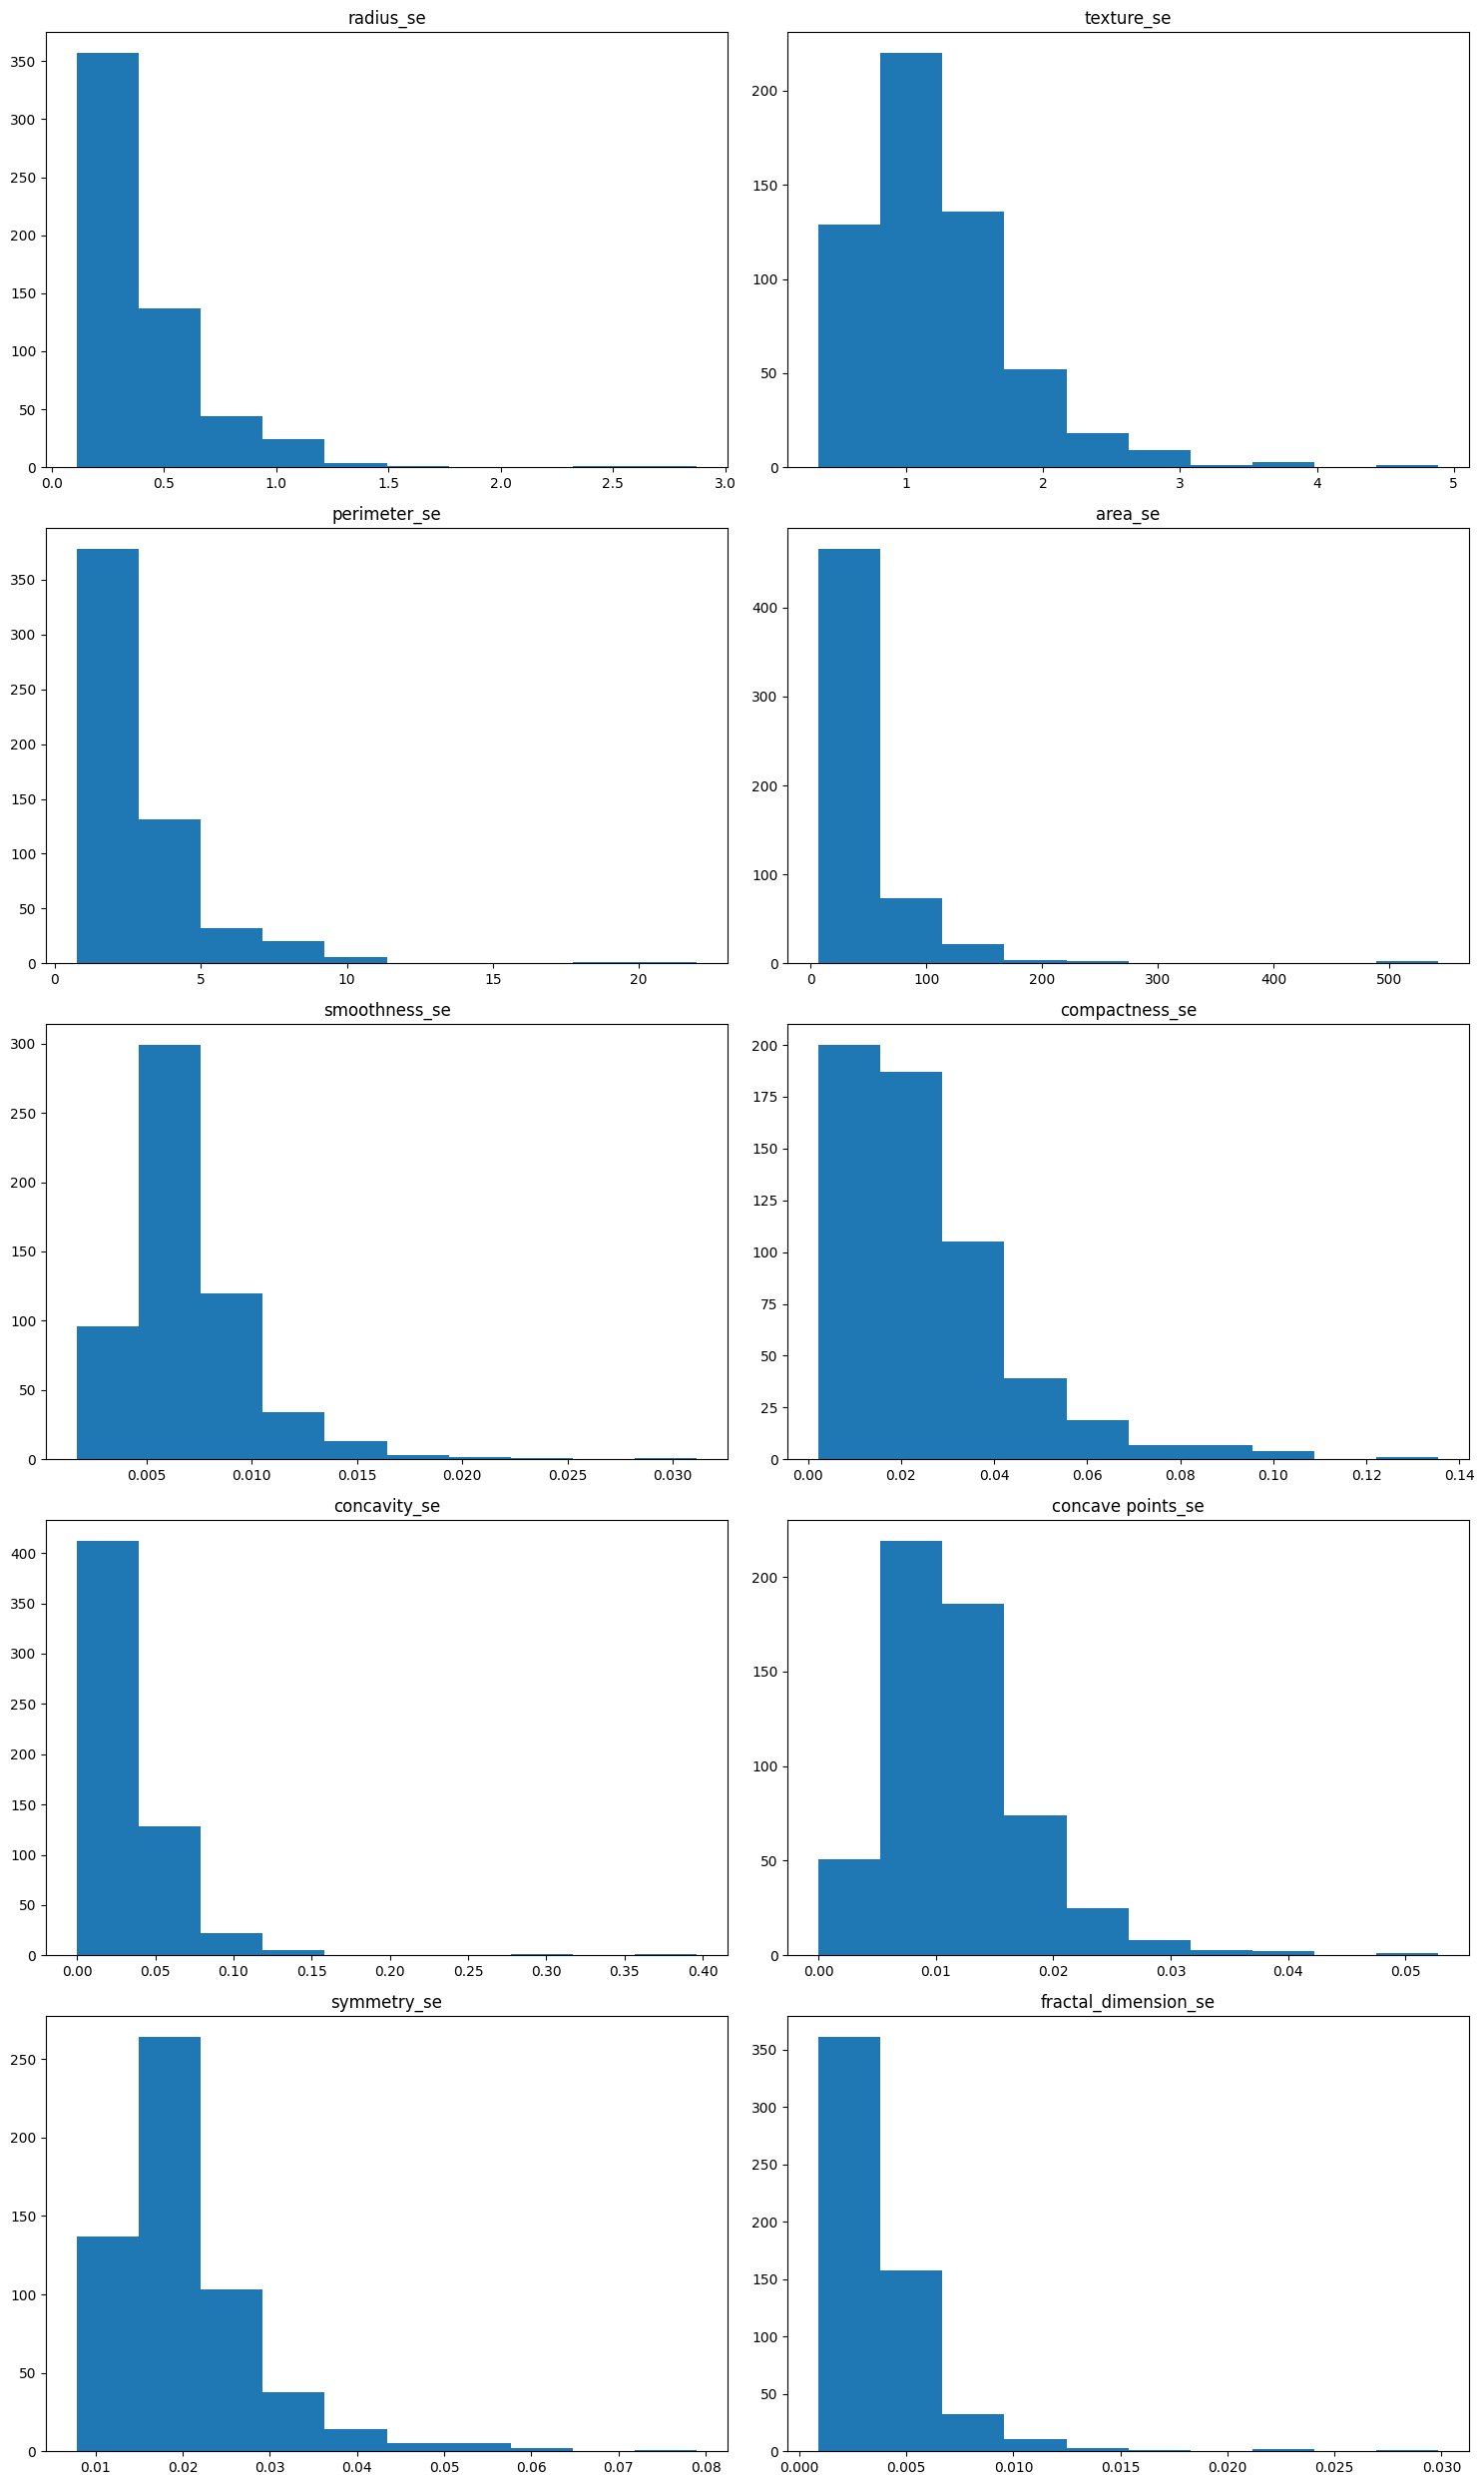

In [10]:
import matplotlib.pyplot as plt

# Set number of rows and columns
rows, cols = 5, 2

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 25))  # Adjust figure size for better visibility
axes = axes.flatten()  # Flatten to 1D for easy iteration

# Plot histograms for each column in df_se
for i, column in enumerate(df_se.columns[:11]):  # Ensure we only plot up to 10 features
    df_se[column].hist(bins=10, ax=axes[i], grid=False)
    axes[i].set_title(column)  # Set title for each subplot

# Adjust layout
plt.tight_layout()
plt.show()

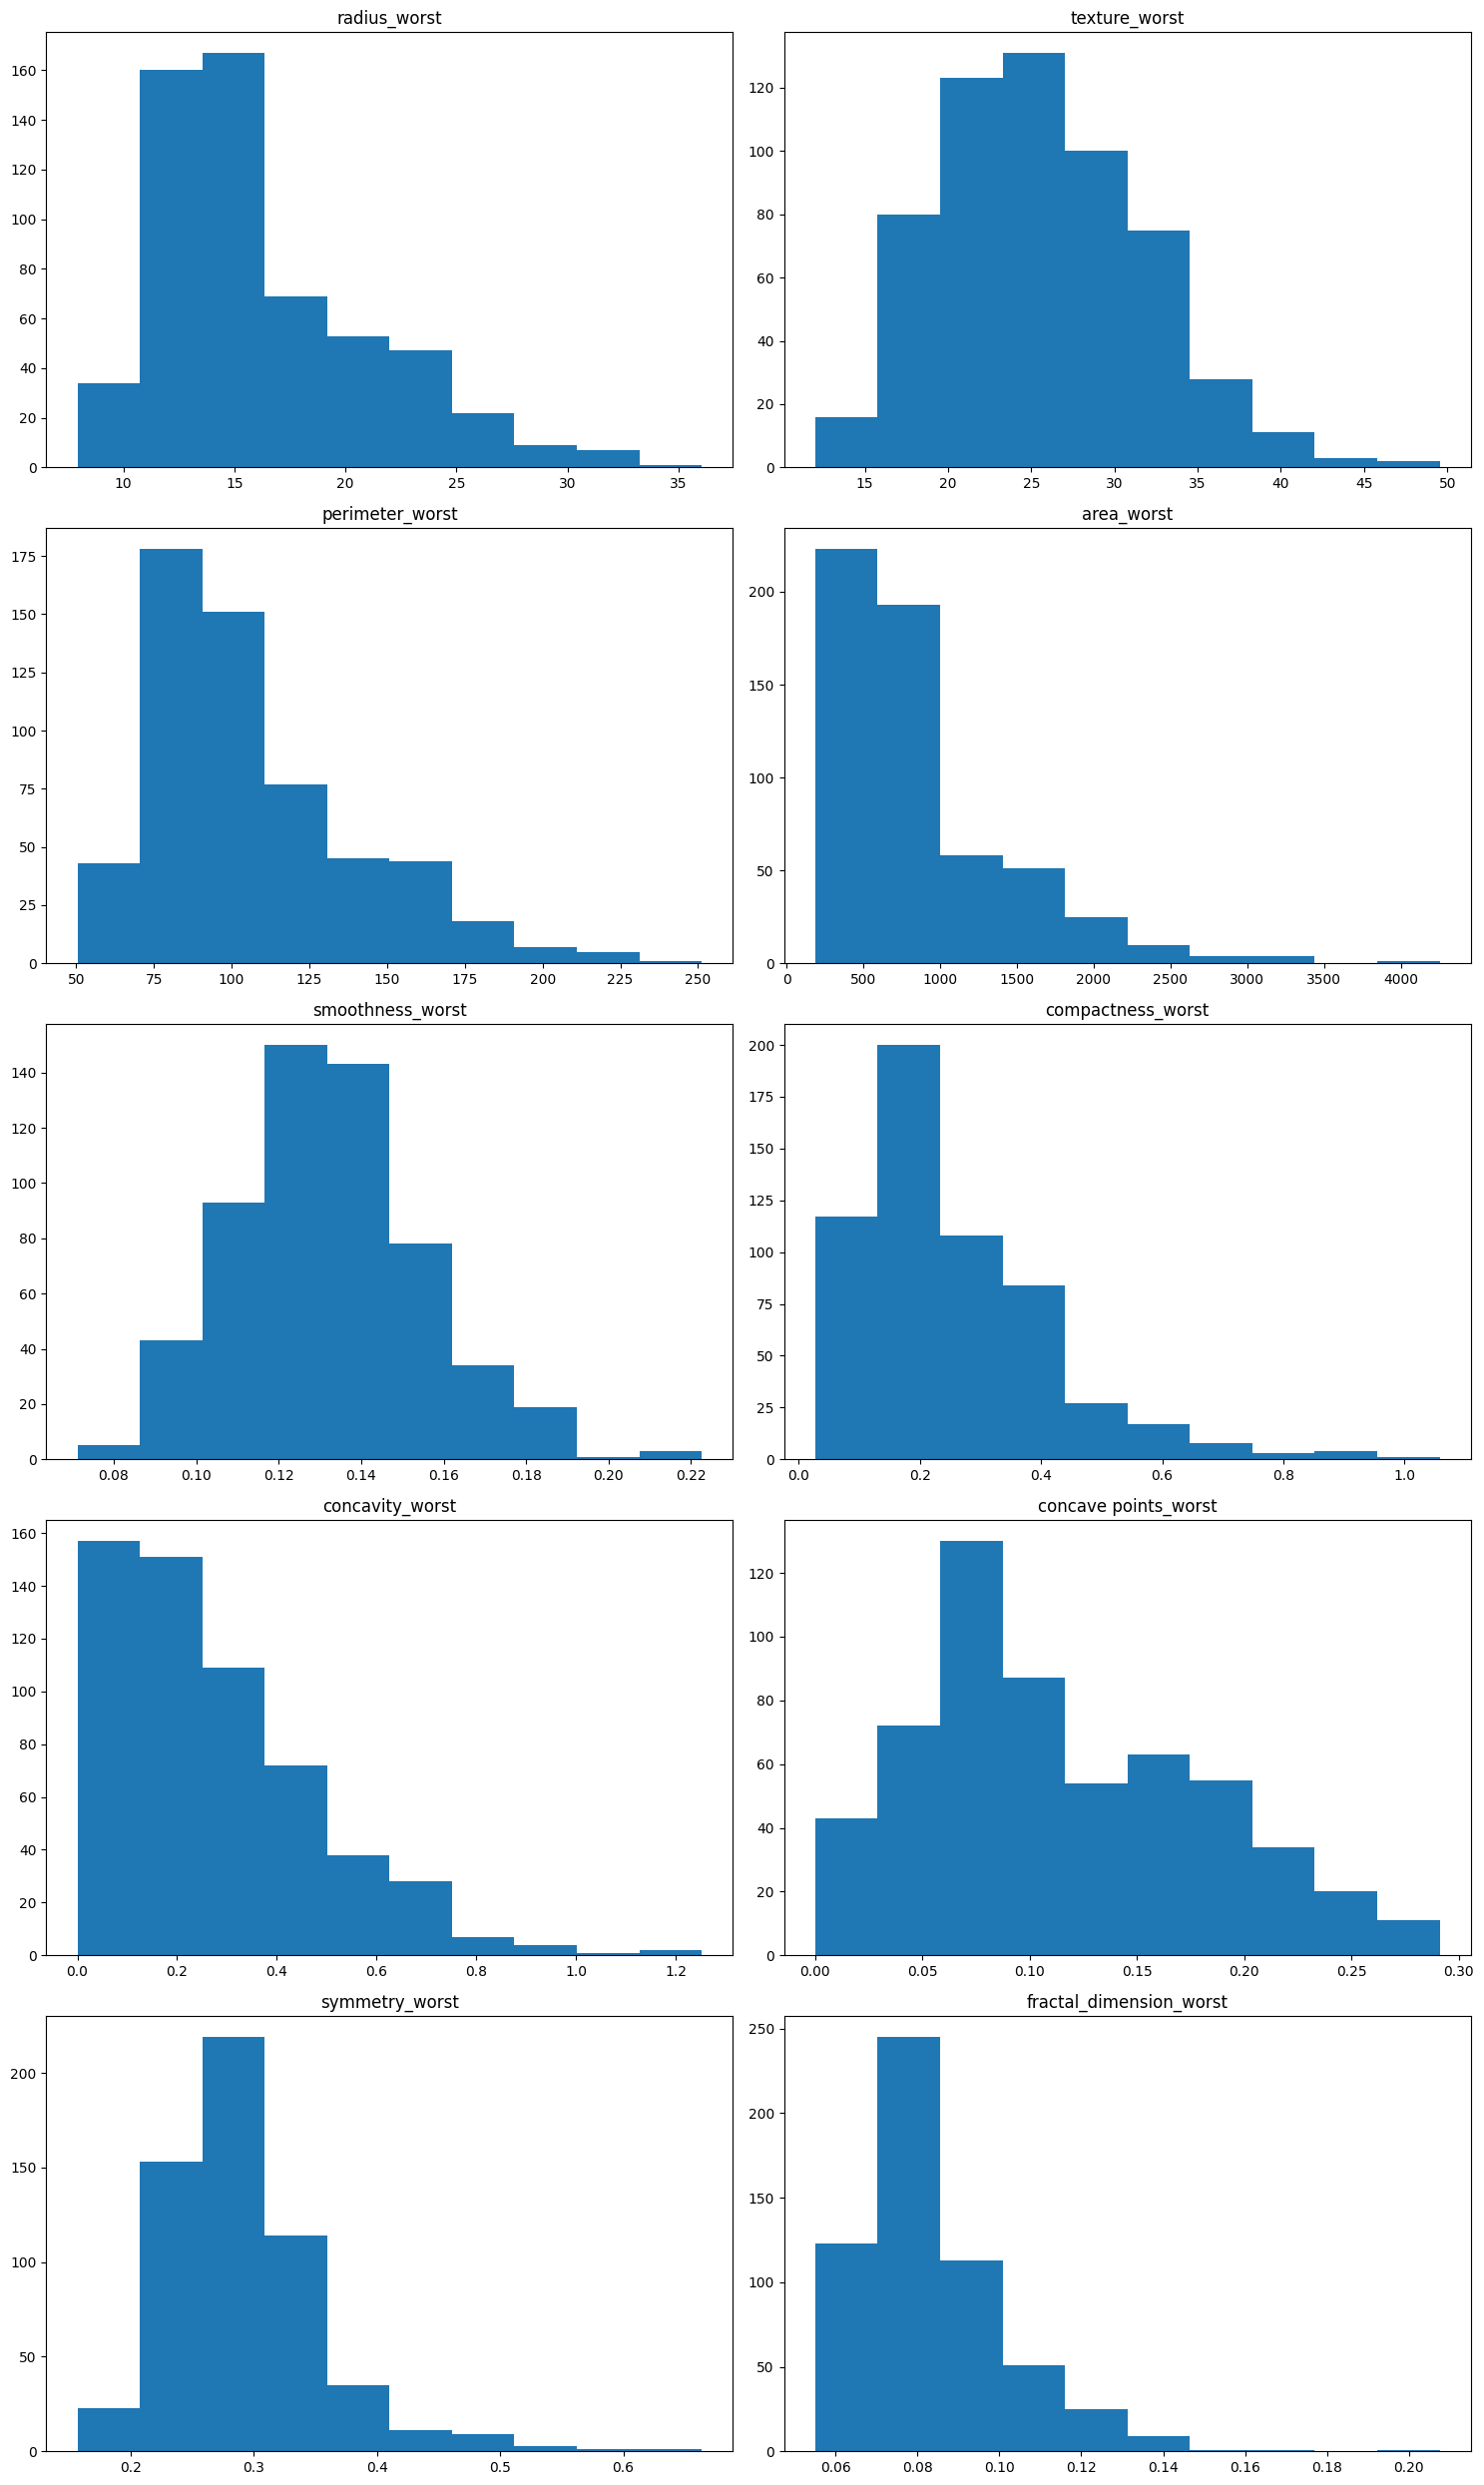

In [11]:
import matplotlib.pyplot as plt

# Set number of rows and columns
rows, cols = 5, 2

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 25))  # Adjust figure size for better visibility
axes = axes.flatten()  # Flatten to 1D for easy iteration

# Plot histograms for each column in df_worst
for i, column in enumerate(df_worst.columns[:11]):  # Ensure we only plot up to 10 features
    df_worst[column].hist(bins=10, ax=axes[i], grid=False)
    axes[i].set_title(column)  # Set title for each subplot

# Adjust layout
plt.tight_layout()
plt.show()

We also take a look at the distributions of data. Therefore, we do density plots.

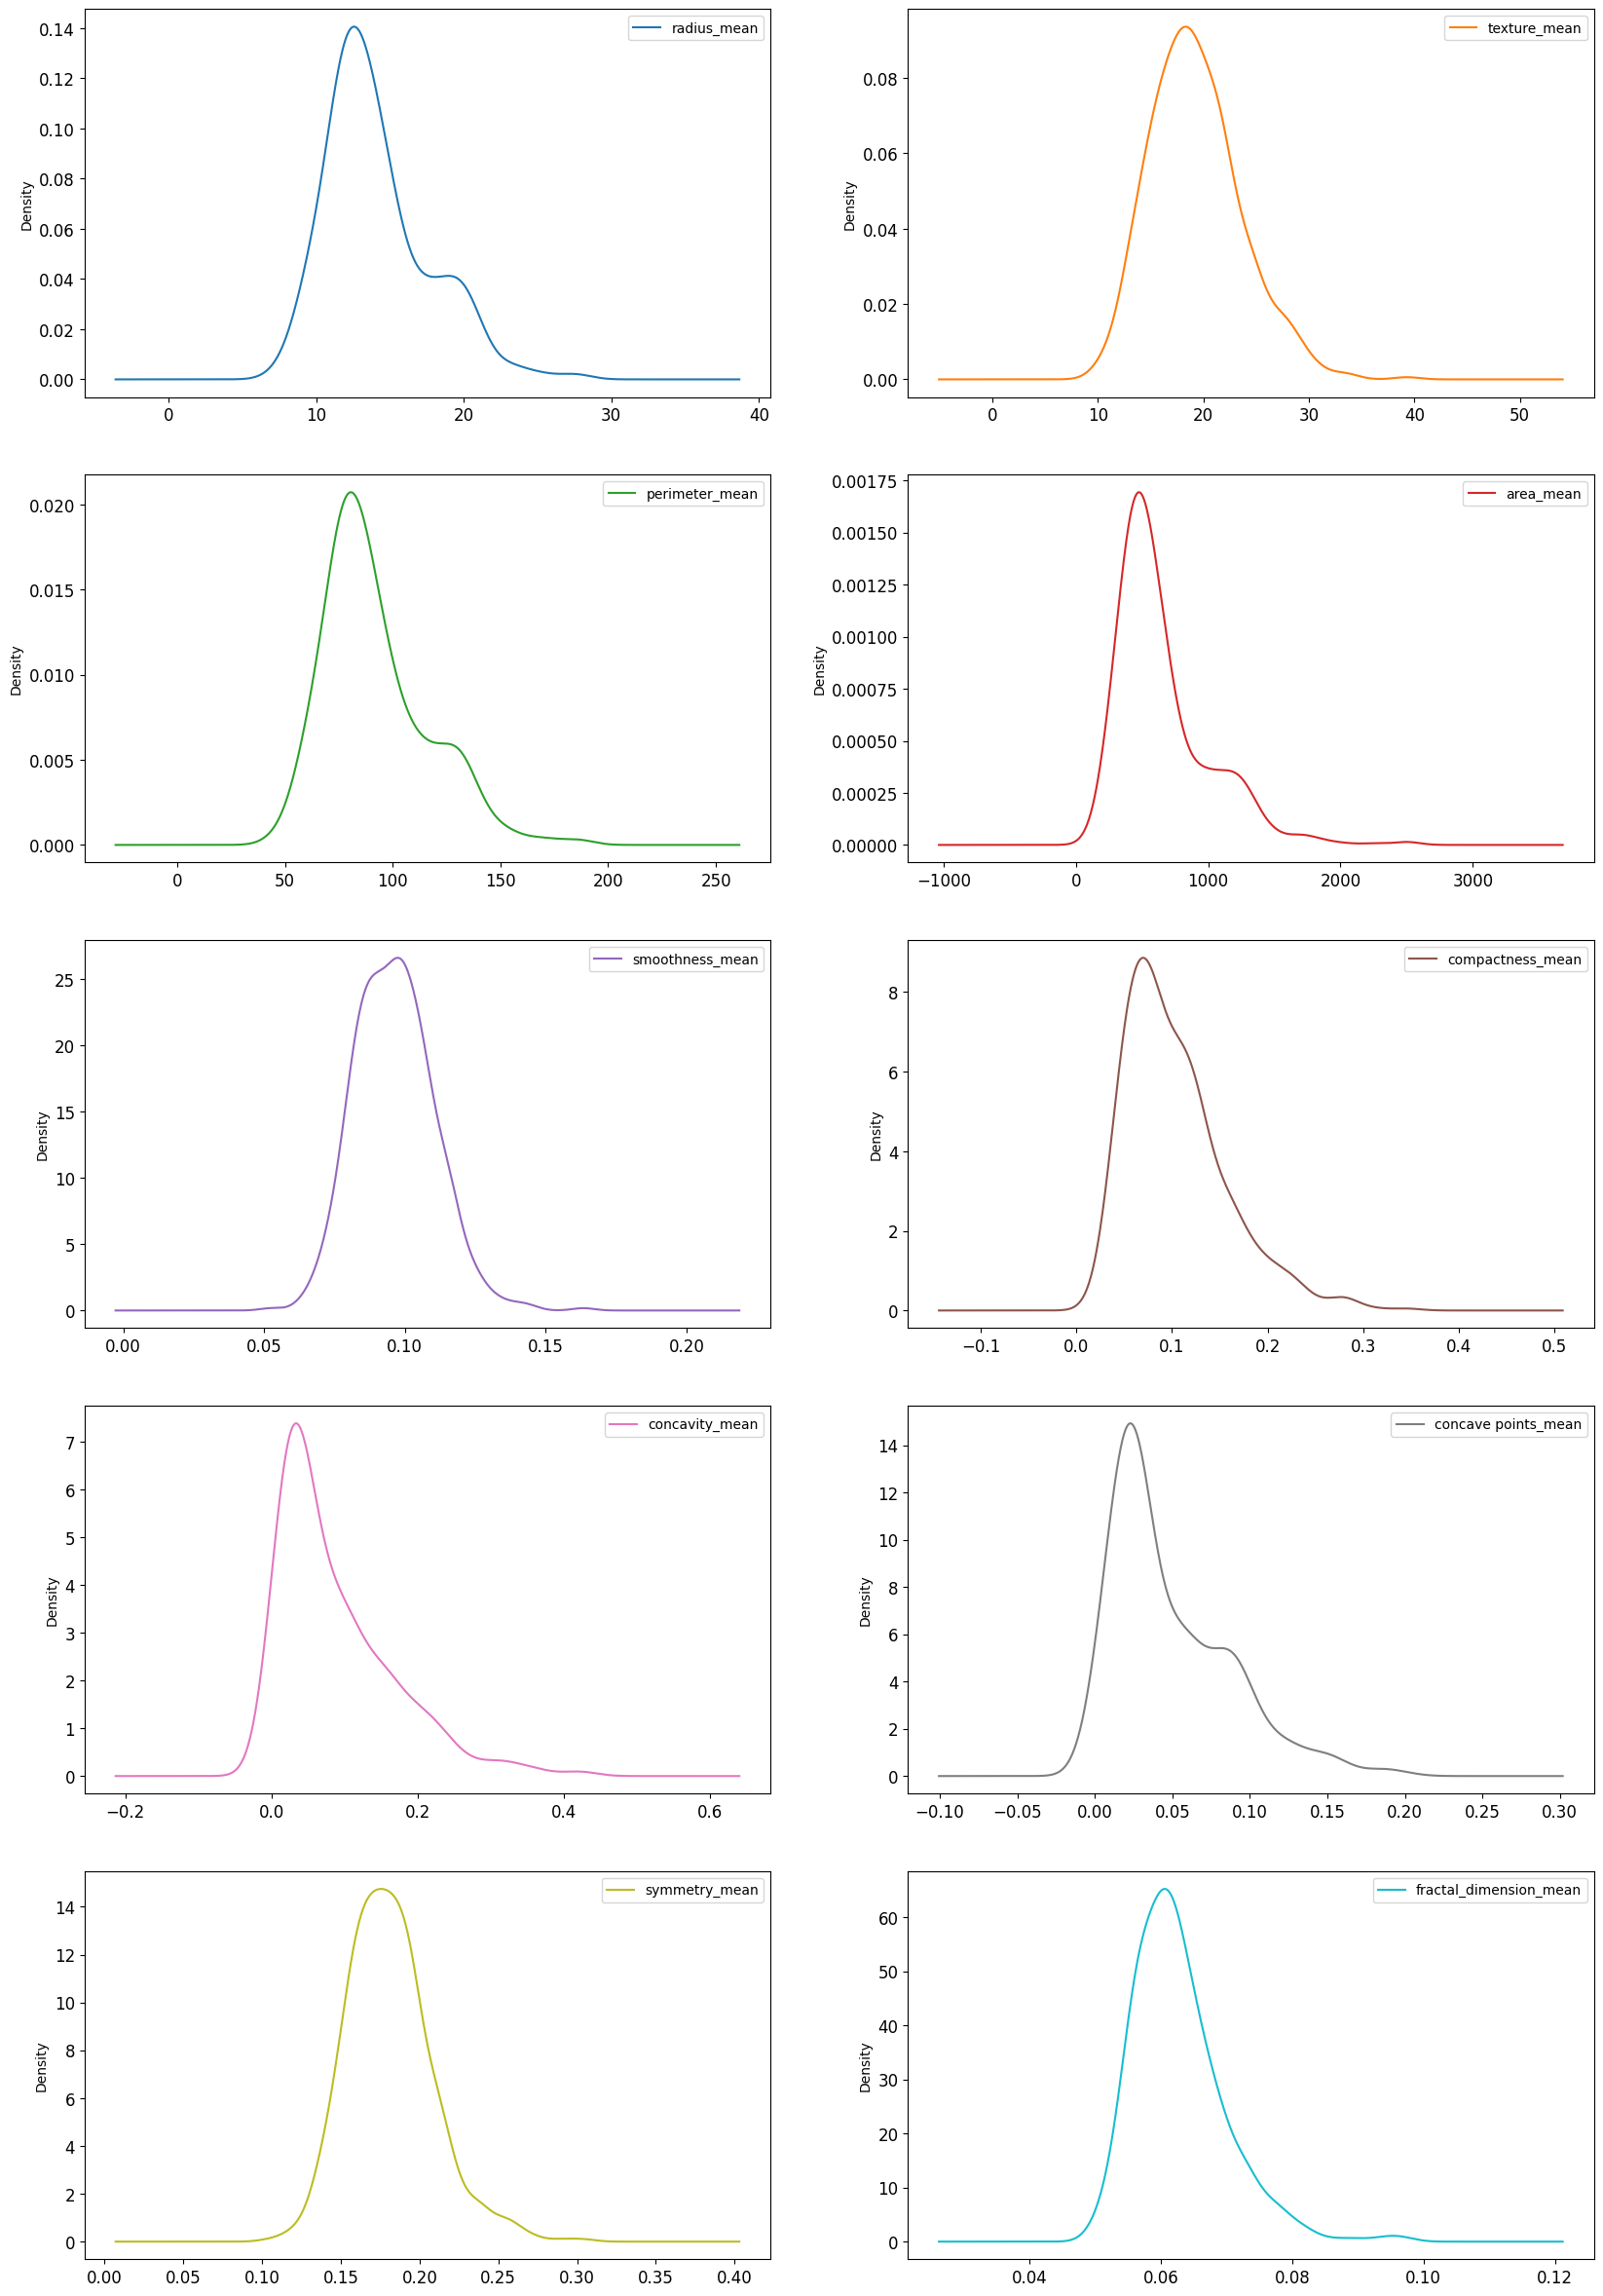

In [12]:
plt = df_mean.plot(kind= 'density', subplots=True, layout=(5,2), sharex=False,
                    sharey=False, fontsize=12, figsize=(20,30))

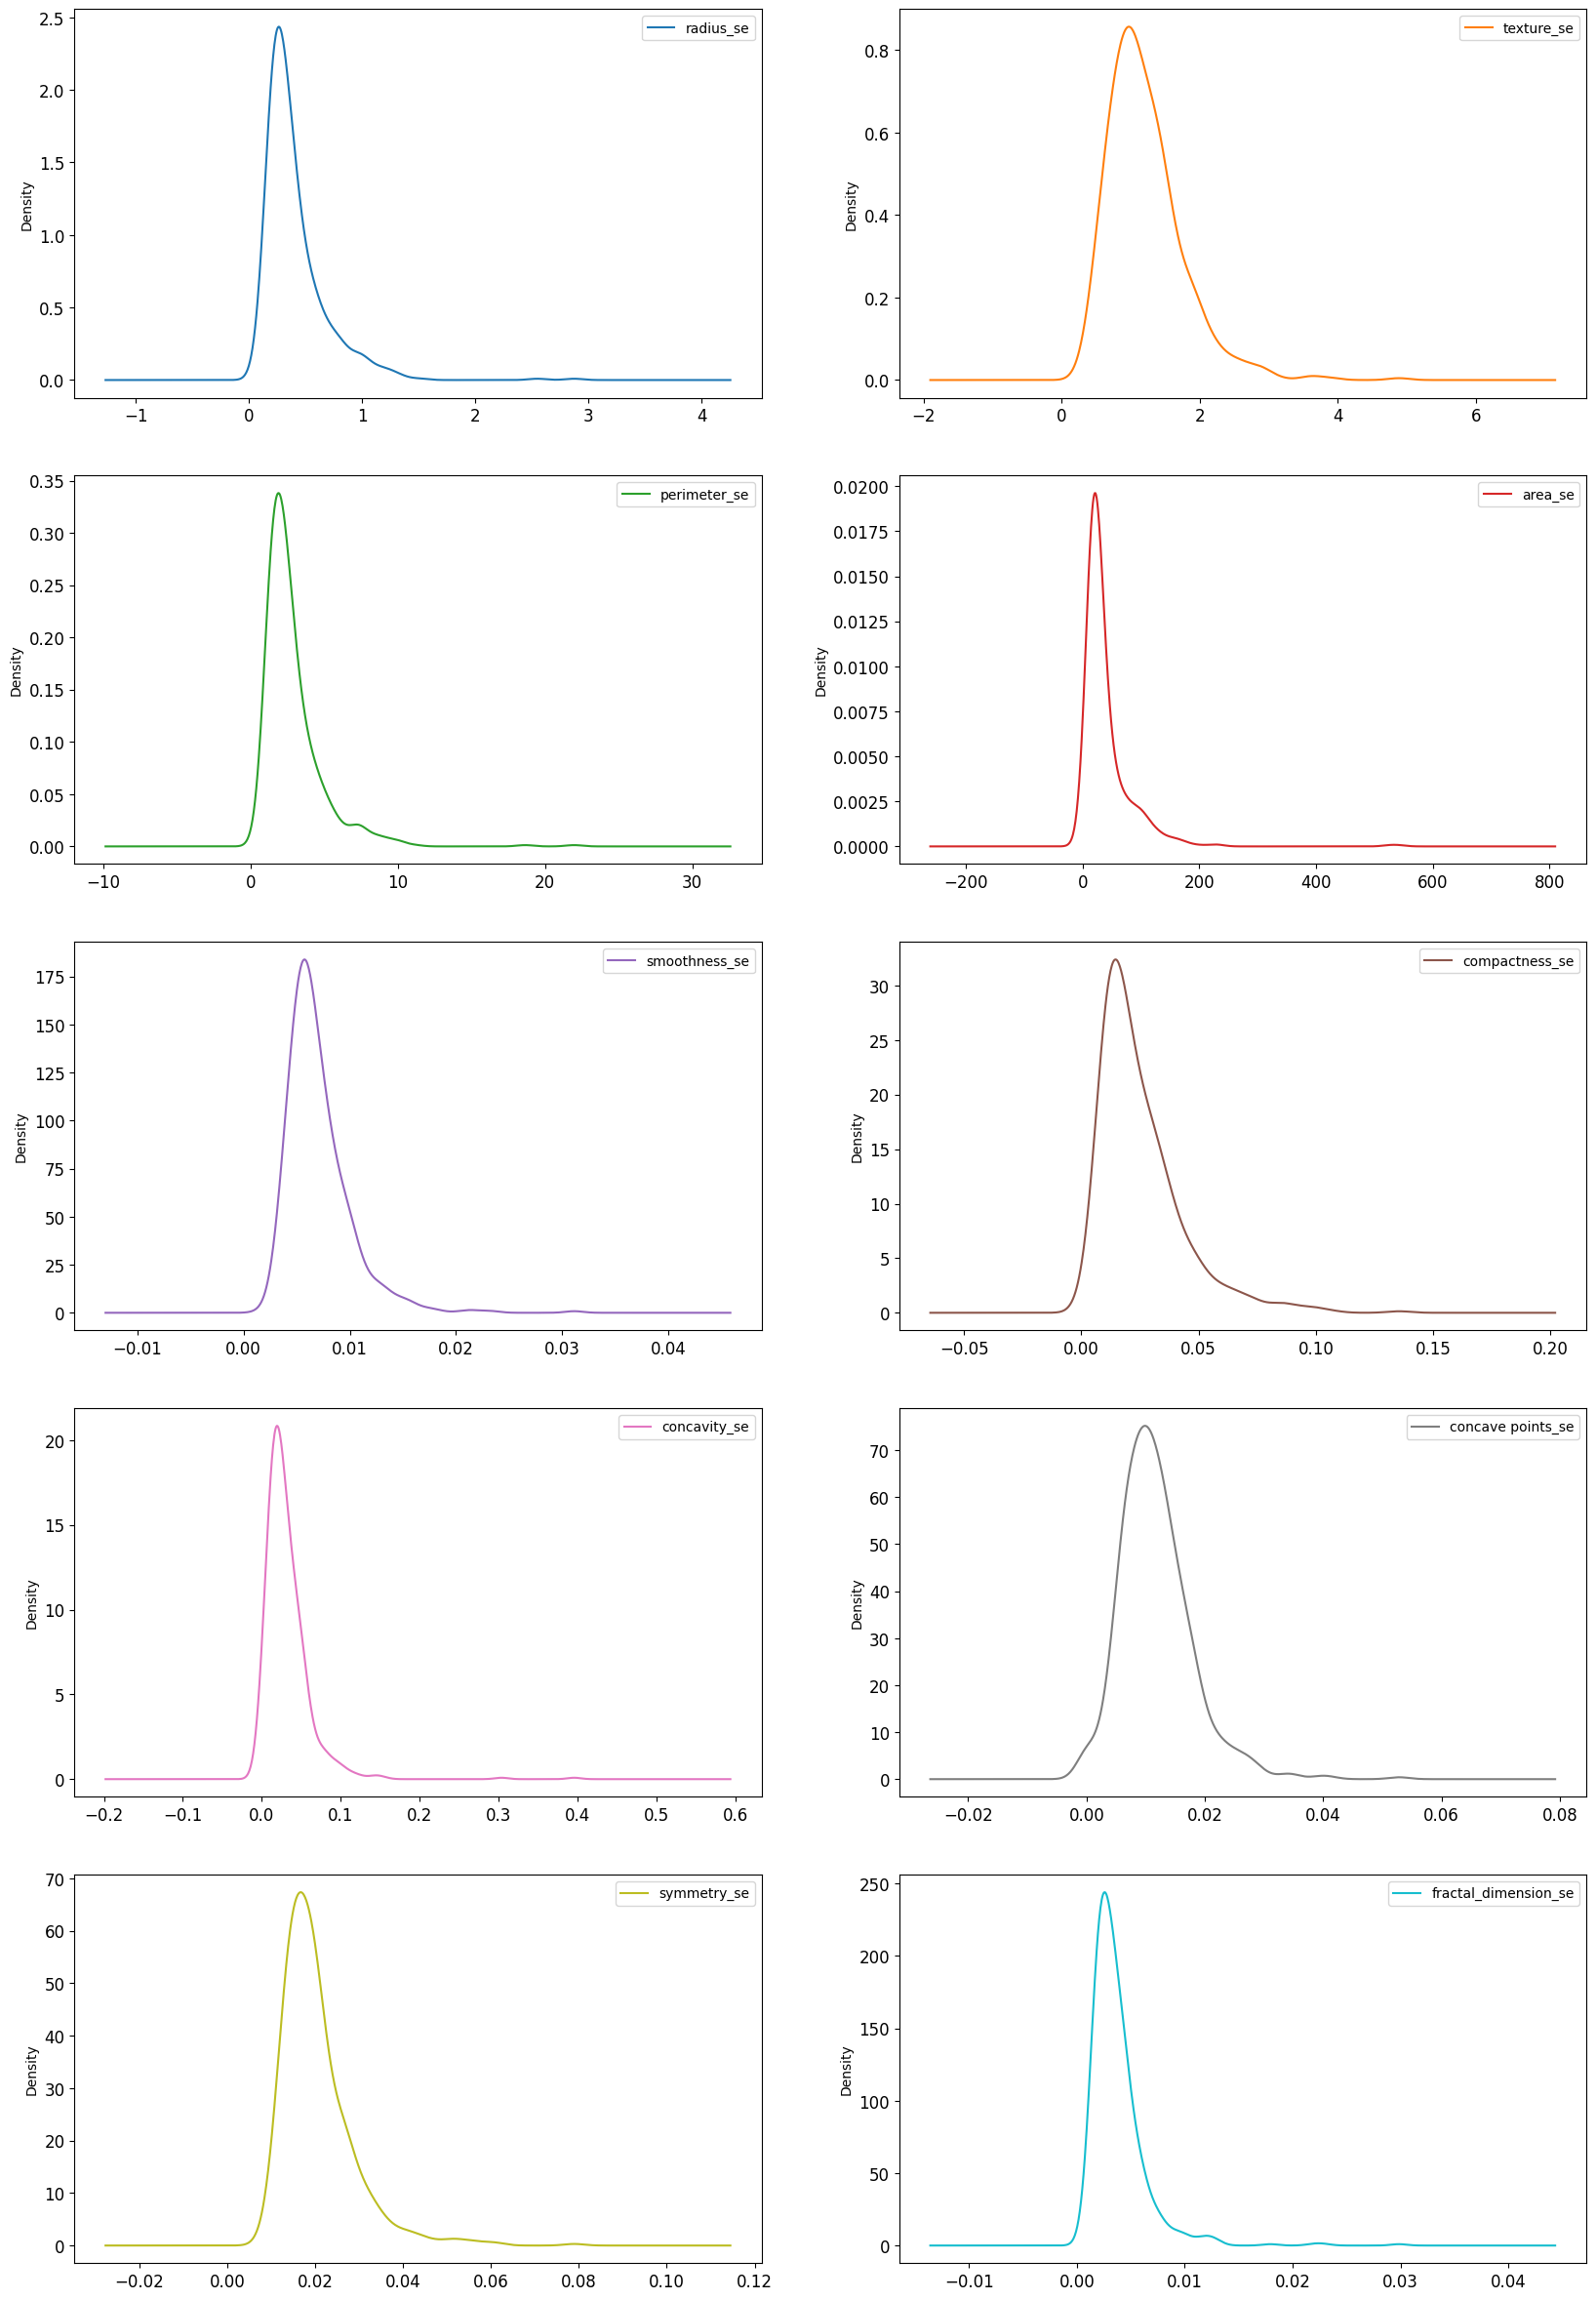

In [13]:
plt = df_se.plot(kind= 'density', subplots=True, layout=(5,2), sharex=False,
                    sharey=False, fontsize=12, figsize=(20,30))

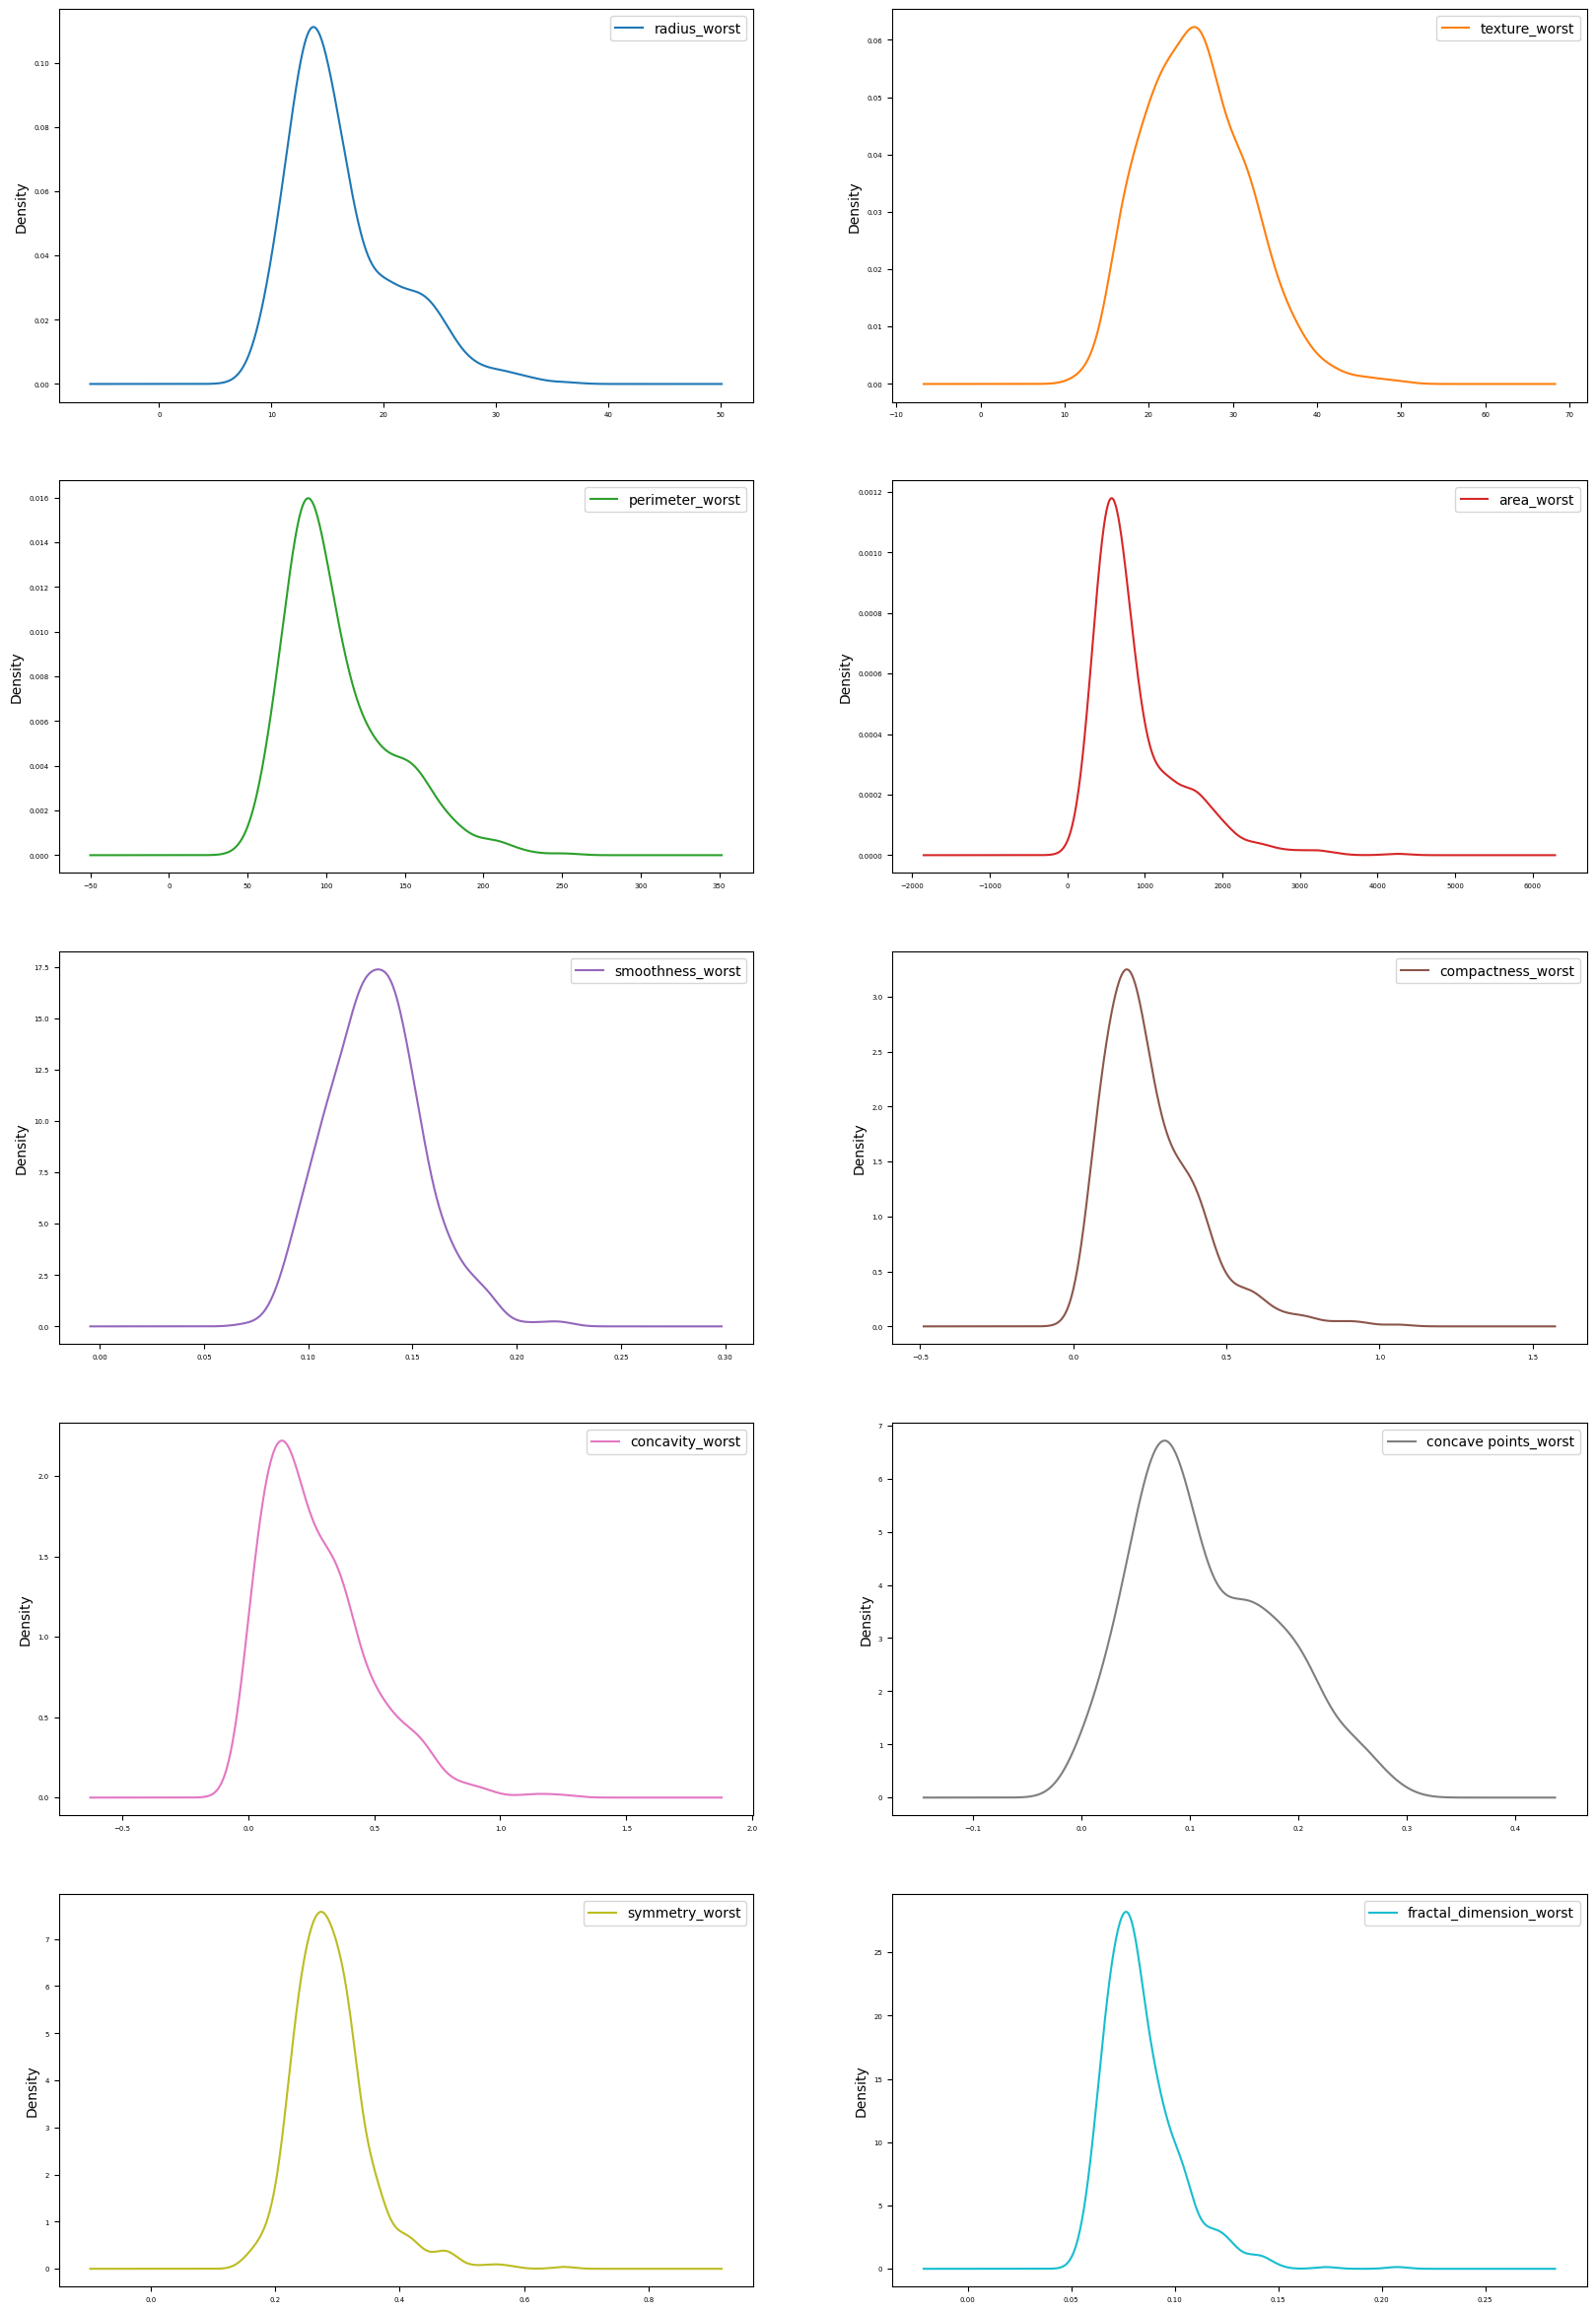

In [14]:
plt = df_worst.plot(kind= 'kde', subplots=True, layout=(5,2), sharex=False, sharey=False,
                    fontsize=5, figsize=(20,30))

We can now look at the correlation matrix.

<Axes: title={'center': 'Breast Cancer Feature Correlation'}>

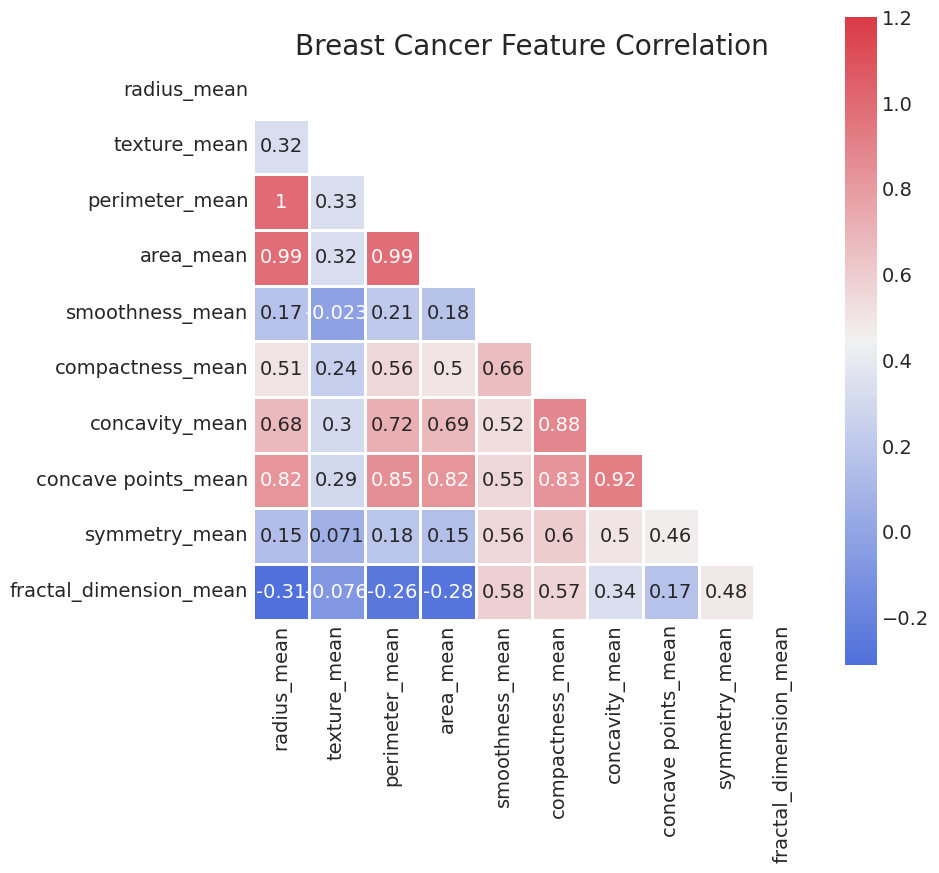

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')
sns.set_style("white")

df = pd.read_csv('https://raw.githubusercontent.com/NLDL-breast-cancer/NLDL-breast-cancer/refs/heads/main/data_clean.csv', index_col=False)
df.drop('Unnamed: 0',axis=1, inplace=True)

corr = df_mean.drop('diagnosis', axis=1).corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

df, ax = plt.subplots(figsize=(8, 8))
plt.title('Breast Cancer Feature Correlation')

cmap = sns.diverging_palette(260, 10, as_cmap=True)

sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask,
            ax=ax,annot=True, fmt='.2g',linewidths=2)

<Axes: title={'center': 'Breast Cancer Feature Correlation'}>

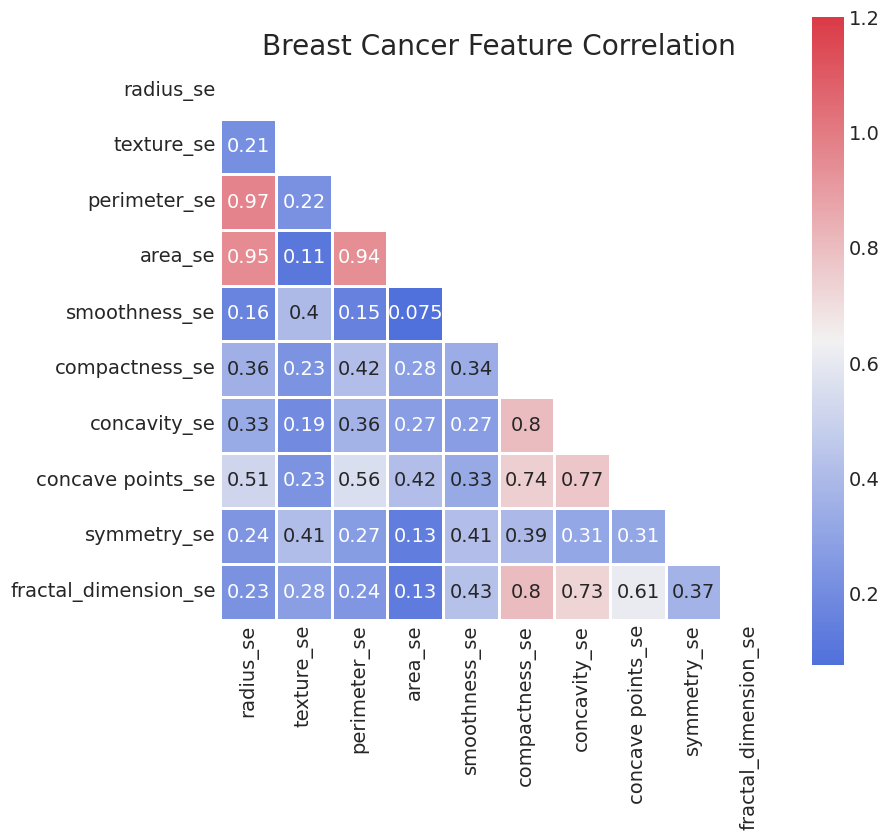

In [17]:
plt.style.use('fivethirtyeight')
sns.set_style("white")

df = pd.read_csv('https://raw.githubusercontent.com/NLDL-breast-cancer/NLDL-breast-cancer/refs/heads/main/data_clean.csv', index_col=False)
df.drop('Unnamed: 0',axis=1, inplace=True)

corr = df_se.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

df, ax = plt.subplots(figsize=(8, 8))
plt.title('Breast Cancer Feature Correlation')

cmap = sns.diverging_palette(260, 10, as_cmap=True)

sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask,
            ax=ax,annot=True, fmt='.2g',linewidths=2)

<Axes: title={'center': 'Breast Cancer Feature Correlation'}>

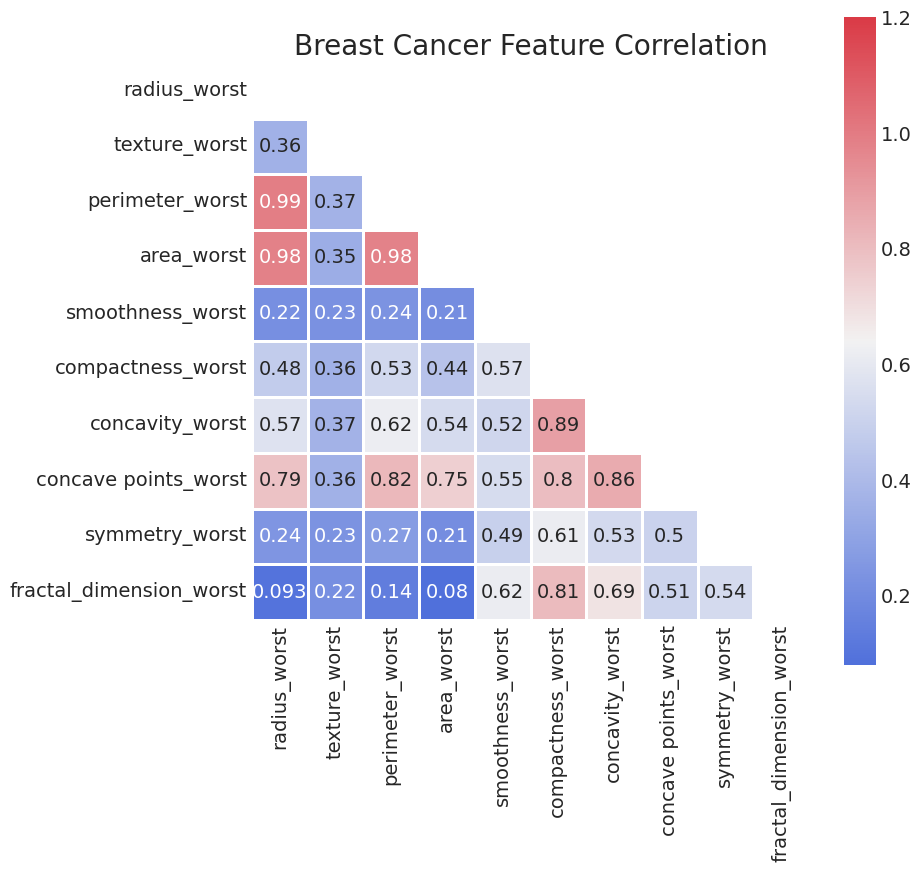

In [18]:
plt.style.use('fivethirtyeight')
sns.set_style("white")

df = pd.read_csv('https://raw.githubusercontent.com/NLDL-breast-cancer/NLDL-breast-cancer/refs/heads/main/data_clean.csv', index_col=False)
df.drop('Unnamed: 0',axis=1, inplace=True)

corr = df_worst.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

df, ax = plt.subplots(figsize=(8, 8))
plt.title('Breast Cancer Feature Correlation')

cmap = sns.diverging_palette(260, 10, as_cmap=True)

sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask,
            ax=ax,annot=True, fmt='.2g',linewidths=2)

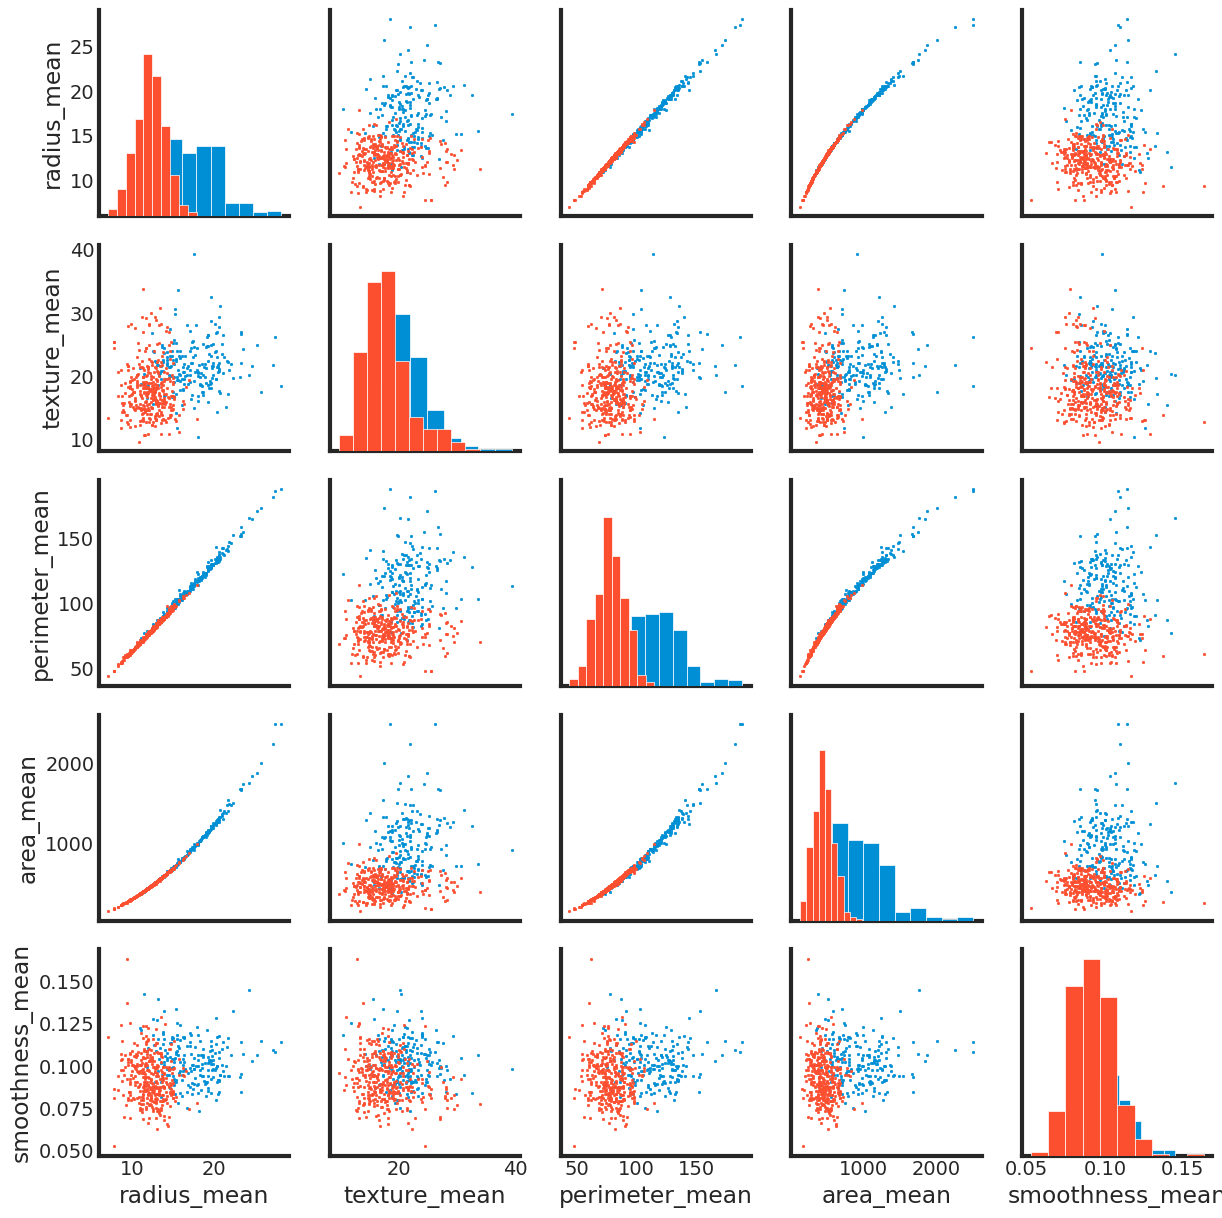

In [22]:
plt.style.use('fivethirtyeight')
sns.set_style("white")

df = pd.read_csv('https://raw.githubusercontent.com/NLDL-breast-cancer/NLDL-breast-cancer/refs/heads/main/data_clean.csv', index_col=False)
g = sns.PairGrid(df[[df.columns[1],df.columns[2], df.columns[3],
                     df.columns[4], df.columns[5], df.columns[6]]], hue='diagnosis')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s = 3)

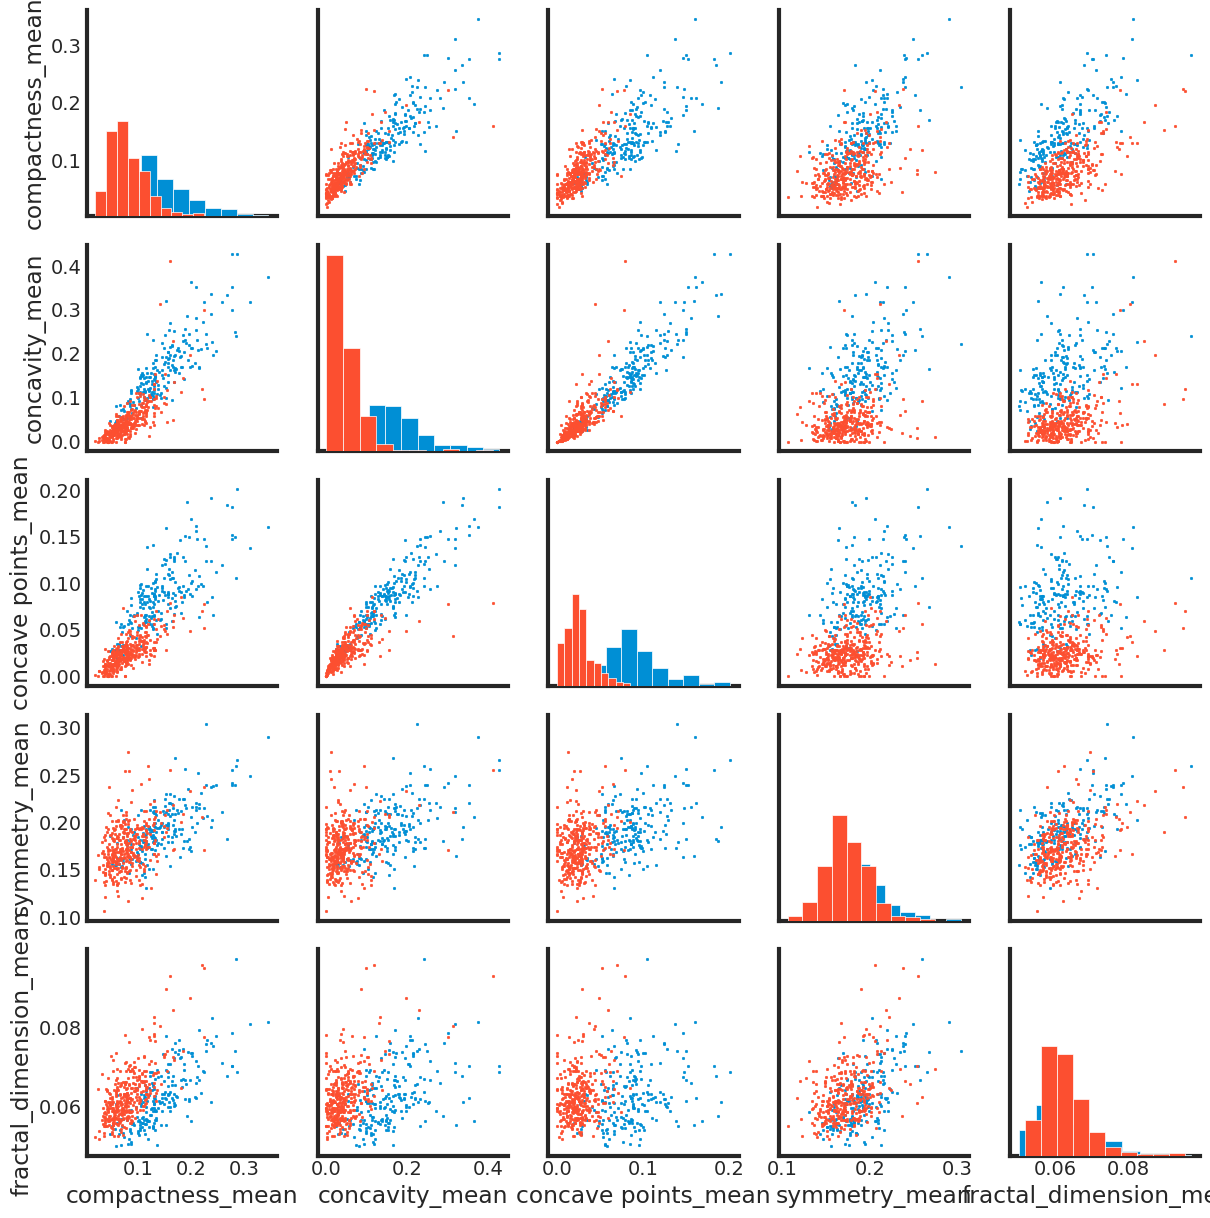

In [23]:
plt.style.use('fivethirtyeight')
sns.set_style("white")

df = pd.read_csv('https://raw.githubusercontent.com/NLDL-breast-cancer/NLDL-breast-cancer/refs/heads/main/data_clean.csv', index_col=False)
g = sns.PairGrid(df[[df.columns[1],df.columns[7], df.columns[8],
                     df.columns[9], df.columns[10], df.columns[11]]], hue='diagnosis')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s = 3)

#Section 3 Logistic regression

In this part we look at predictions of the tumor types using logistic regression method. Reference for this part will be [the following code](https://github.com/Bushramjad/Cancer-Type-prediction-Logistic-Regression/blob/main/From_scratch_LR.ipynb).

In [34]:
class LogisticRegressionn:
    def __init__(self,x,y):
        self.intercept = np.ones((x.shape[0], 1))
        self.x = np.concatenate((self.intercept, x), axis=1)
        self.weight = np.zeros(self.x.shape[1])
        self.y = y

    def sigmoid(self, x, weight):
        z = np.dot(x, weight)
        return 1 / (1 + np.exp(-z))

    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def gradient_descent(self, X, h, y):
        return np.dot(X.T, (h - y)) / y.shape[0]

    def fit(self, lr , iterations):
        for i in range(iterations):
            sigma = self.sigmoid(self.x, self.weight)
            loss = self.loss(sigma,self.y)
            dW = self.gradient_descent(self.x , sigma, self.y)

            #Updating the weights
            self.weight -= lr * dW

        return print('Fitted successfully to Data')

    def predict(self, x_test , threshold):
        x_test = np.concatenate((np.ones((x_test.shape[0], 1)) , x_test), axis=1)
        result = self.sigmoid(x_test, self.weight)

        result = result >= threshold
        y_pred = np.zeros(result.shape[0])
        for i in range(len(y_pred)):
            if result[i] == True:
                y_pred[i] = 1
            else:
                continue

        return y_pred

Now when we have function for logistic regression, next thing to do is to set train and test sets. Since the diagnosis is either malignant or benign tumor, it is going to be denoted with either 0 (for benign) or 1 (for malignant). For that we are going to use function labelEncoder().

In [35]:
x_train=df[df.columns.drop('diagnosis')]
y_train=df['diagnosis']

print(df.shape)
print(x_train.shape)
print(y_train.shape)

(569, 31)
(569, 30)
(569,)


In [36]:
labelencoder_Y = LabelEncoder()
y_train = labelencoder_Y.fit_transform(y_train)

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.30, random_state=0)

In [38]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [39]:
lg = LogisticRegressionn(x_train,y_train)
lg.fit(0.1 , 5000)

y_pred = lg.predict(x_test, 0.5)
print(y_pred.shape)
print(y_test.shape)

<ipython-input-34-d9d9e02cc2da>:13: RuntimeWarning: divide by zero encountered in log
  return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
<ipython-input-34-d9d9e02cc2da>:13: RuntimeWarning: invalid value encountered in multiply
  return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()


Fitted successfully to Data
(171,)
(171,)


After splitting to train and test data now we can calculate mean squared error and $R^2$ score to see how well our regression function fits to the model.

In [ ]:
print('Mean squared error: %.2f' % mean_squared_error(y_test,y_pred))
print('R2 Score: %.2f' % r2_score(y_test,y_pred))

Mean squared error: 0.04
R2 Score: 0.85


Finally, we can plot the figure to visually see how well did our prediction work. In the first figure we can see first 100 data, and in the second one all 171 of them.

Text(0.5, 1.0, 'First 100 actual and Predicted values')

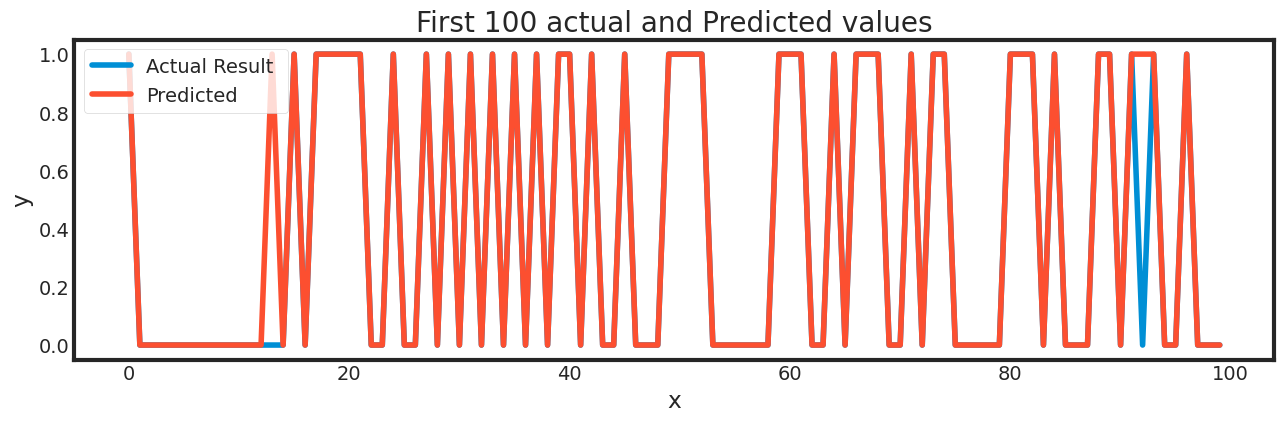

In [40]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.5, 0.8])
axes.plot(y_test[0:100], label="Actual Result ")
axes.plot(y_pred[0:100], label="Predicted")

axes.legend(loc=2);
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('First 100 actual and Predicted values')

Text(0.5, 1.0, 'All Actual and Predicted values')

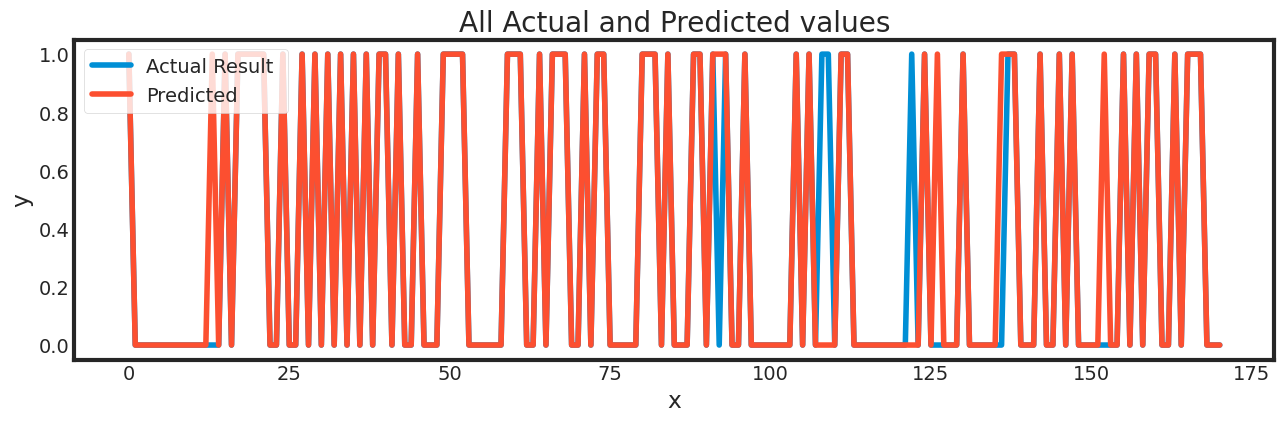

In [41]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.5, 0.8])
axes.plot(y_test[0:200], label="Actual Result ")
axes.plot(y_pred[0:200], label="Predicted")

axes.legend(loc=2);
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('All Actual and Predicted values')

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9532163742690059
[[103   5]
 [  3  60]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       108
           1       0.92      0.95      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

